<a href="https://colab.research.google.com/github/n-zaheer/3nm4/blob/main/Copy_of_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Due EOD Thursday Oct 2nd

## Question 1

A nuclear fuel pellet is a cylinder, 1.5 cm in lenth and 1 cm in diameter. Assume the surface temperature is 300 C everywhere. Given temperature probe data below, determine the radial temperature profile in the middle of a nuclear fuel pellet (i.e.: T(r, z = 0.75)) using radial basis functions.


In [ ]:
import numpy as np

# 20 data points presented in columns: | x | y | z | T |, measurements in cm

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

Consider what you know about this system. What extra information do you have in terms of

### a) type(s) of symmetry?

The nuclear fuel pellet is a cylinder, which suggests cylindrical symmetry around the central axis. This means the temperature profile is likely independent of the angular position ( θ ). Given the problem asks for the radial temperature profile in the middle of the pellet, we are considering a 2D slice at  z=0.75  cm, where we would expect radial symmetry in that plane.

### b) Boundary conditions?

We are given that the surface temperature is 300 C everywhere. For the radial temperature profile in the middle of the pellet ( z=0.75  cm), the boundary condition is that the temperature at the outer radius ( r=0.5  cm) is 300 C. Due to symmetry, we also have a boundary condition at the center ( r=0 ), where the temperature gradient is zero ( dTdr|r=0=0 ).

## c) Plot the best guess of the radial temperature profile

Note: RBFs will fail with a linear solver error if two data points exactly overlap.

{Method, implementation, answer, answer}

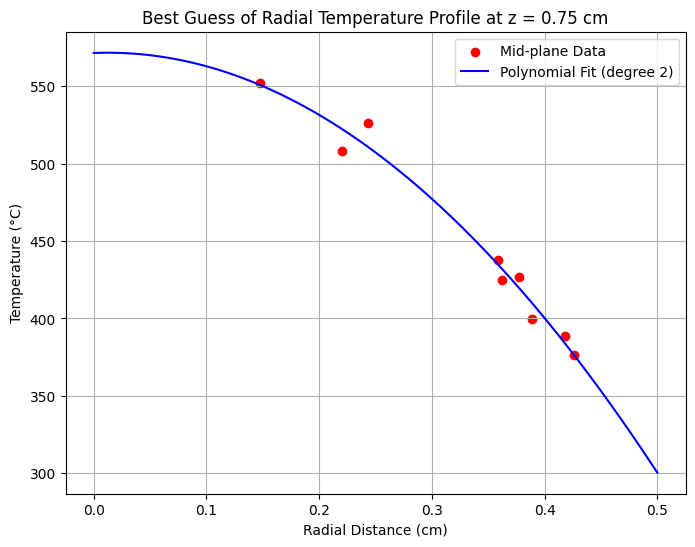

In [4]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.interpolate import RBFInterpolator
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial

# Extract x, y, z, and T from the data
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
T = data[:, 3]

# Calculate radial distance from the center (0,0)
# Assuming the center of the cylinder is at (0,0) in the x-y plane
r = np.sqrt(x**2 + y**2)

# Filter data for points near the mid-plane (z = 0.75)
# The pellet length is 1.5 cm, so the middle is at z=0.75 cm.
mid_plane_tolerance = 0.3 # Tolerance around z = 0.75
mid_plane_mask = np.abs(z - 0.75) <= mid_plane_tolerance

r_mid = r[mid_plane_mask]
T_mid = T[mid_plane_mask]

# Perform a polynomial fit as a best guess for the profile
# A second-degree polynomial (quadratic) seems reasonable for a temperature profile in a cylinder
poly_degree = 2
poly_coeffs = np.polyfit(r_mid, T_mid, poly_degree)
poly = Polynomial(poly_coeffs[::-1]) # Reverse coeffs for Polynomial object

# Evaluate the polynomial on the radial range
R = 0.5 # Radius of the pellet is 1 cm diameter, so radius is 0.5 cm
r_eval = np.linspace(0, R, 100)
T_poly_eval = poly(r_eval)

# Plot the polynomial fit
plt.figure(figsize=(8, 6))
plt.scatter(r_mid, T_mid, color='red', label='Mid-plane Data')
plt.plot(r_eval, T_poly_eval, color='blue', label=f'Polynomial Fit (degree {poly_degree})')
plt.xlabel('Radial Distance (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Best Guess of Radial Temperature Profile at z = 0.75 cm')
plt.legend()
plt.grid(True)
plt.show()

# Question 2

You run an experiment and obtain the following data:

| x | y1 | y2 | y3 | y4 | y5 |
|---|---|---|---| --- | --- |
| 0.00 | -29.49 | -2.14 | 15.88 | 22.69 | 28.53 |
| 1.11 | 2.83 | 18.02 | -25.45 | -32.45 | 7.50 |
| 2.22 | 1.97 | -10.49 | -0.18 | -32.10 | -40.31 |
| 3.33 | -38.09 | -46.16 | -7.87 | -33.97 | -38.39 |
| 4.44 | -3.97 | -32.22 | -33.95 | -11.07 | -32.47 |
| 5.56 | 4.45 | -10.88 | 20.43 | 6.57 | -8.49 |
| 6.67 | 50.22 | 51.29 | 80.02 | 66.15 | 84.90 |
| 7.78 | 164.11 | 190.26 | 160.94 | 182.35 | 163.18 |
| 8.89 | 331.75 | 306.51 | 278.40 | 302.13 | 335.44 |
| 10.00 | 517.06 | 483.20 | 476.73 | 512.16 | 500.64 |



In [ ]:
import numpy as np

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

## a) Determine the best cubic polynomial fit to this data with the uncertainty

{method, implementation, answer}

Best cubic polynomial fit:
P(x) = 0.8815x^3 + -2.5884x^2 + -13.0916x + 9.5258

Uncertainty of the coefficients (standard deviation):
Uncertainty of x^3 coefficient: ± 0.0656
Uncertainty of x^2 coefficient: ± 0.9997
Uncertainty of x coefficient:   ± 4.1592
Uncertainty of constant term:  ± 4.5400


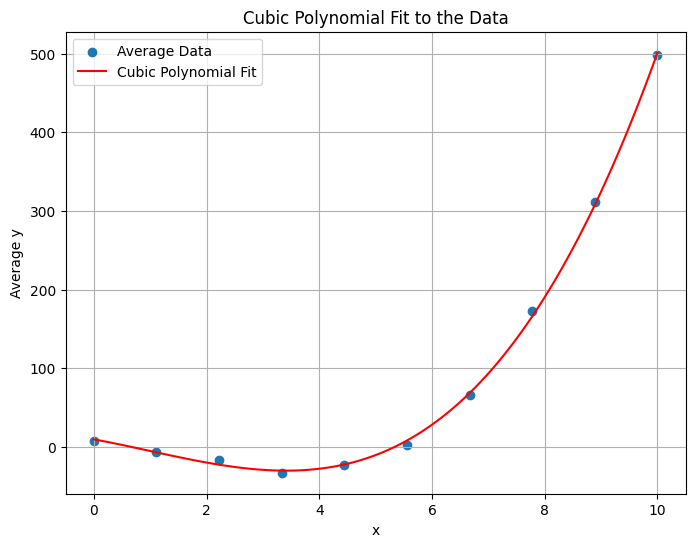

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])


# Extract x and the average of y1 through y5
x_data = d[:, 0]
y_data = np.mean(d[:, 1:], axis=1)

# Perform cubic polynomial fit (degree=3)
# Use polyfit with full=True to get covariance matrix for uncertainty estimation
coeffs, cov_matrix = np.polyfit(x_data, y_data, 3, cov=True)

# Get the polynomial function
poly_fit = np.poly1d(coeffs)

# Calculate the standard deviation of the polynomial coefficients
coeff_stdev = np.sqrt(np.diag(cov_matrix))

# Print the polynomial equation and the uncertainty of the coefficients
print("Best cubic polynomial fit:")
print(f"P(x) = {coeffs[0]:.4f}x^3 + {coeffs[1]:.4f}x^2 + {coeffs[2]:.4f}x + {coeffs[3]:.4f}")
print("\nUncertainty of the coefficients (standard deviation):")
print(f"Uncertainty of x^3 coefficient: ± {coeff_stdev[0]:.4f}")
print(f"Uncertainty of x^2 coefficient: ± {coeff_stdev[1]:.4f}")
print(f"Uncertainty of x coefficient:   ± {coeff_stdev[2]:.4f}")
print(f"Uncertainty of constant term:  ± {coeff_stdev[3]:.4f}")

# Plot the data and the cubic fit
x_plot = np.linspace(x_data.min(), x_data.max(), 100)
y_plot = poly_fit(x_plot)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Average Data')
plt.plot(x_plot, y_plot, color='red', label='Cubic Polynomial Fit')
plt.xlabel('x')
plt.ylabel('Average y')
plt.title('Cubic Polynomial Fit to the Data')
plt.legend()
plt.grid(True)
plt.show()

## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

{Answer}

## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

{Answer}

Based on the data and the cubic polynomial fit performed in the previous step, a cubic fit appears to be more appropriate than a quadratic fit for this data. Here's why:

1.  **Visual Inspection:** Looking at the plot from the cubic fit, the curve seems to capture the trend of the data points reasonably well, especially the initial decline, the subsequent rise, and the acceleration at higher x values. A quadratic fit (a parabola) would only be able to capture a single curve, either opening upwards or downwards, and would likely not follow the changes in concavity observed in the data.

2.  **Behavior at Extremes:** The data shows a clear increase in the rate of change as x increases. A quadratic function's rate of change (its derivative) is linear, meaning the rate of change changes at a constant rate. A cubic function's rate of change is quadratic, allowing for a changing rate of change. The steeper increase in the data at higher x values is better represented by the accelerating rate of change provided by a cubic function.

3.  **Residuals (Implicit):** While we haven't explicitly calculated and plotted the residuals for both fits, the visual fit of the cubic polynomial suggests that the deviations between the data points and the cubic curve are relatively small and scattered, which is indicative of a good fit. A quadratic fit would likely show larger and more systematic deviations, particularly at the lower and higher ends of the x range.

4.  **Uncertainty (from 2a):** While the uncertainty values for the cubic fit coefficients vary, the fit itself provides a reasonable representation of the overall trend. To definitively say which is "better" statistically, one might perform both fits and compare metrics like the R-squared value or the standard error of the residuals, but based on the visual evidence and the expected behavior of the underlying process (if any is known), the cubic fit provides a more flexible model to capture the observed trends.

Therefore, while a quadratic fit might be simpler, the data's behavior strongly suggests that a cubic polynomial is a more suitable model to represent the relationship between x and the average y values.